# Detecting Parkinson's Disease

**Author:** [Syed Muhammad Ebad](https://www.kaggle.com/syedmuhammadebad)  
**Date:** 26-Nov-2024  
[Send me an email](mailto:mohammadebad1@hotmail.com)  
[Visit my GitHub profile](https://github.com/smebad)

**Dataset:** [Parkinson’s Disease Data Set](https://www.kaggle.com/datasets/vikasukani/parkinsons-disease-data-set?resource=download)

## Introduction
Parkinson's disease is a progressive nervous system disorder that affects movement. Early detection can significantly improve the quality of life for patients. In this project, we will classify whether a patient has Parkinson's disease using various acoustic parameters measured in voice recordings.

We will:
1. Perform exploratory data analysis (EDA).
2. Preprocess the data for machine learning.
3. Train and evaluate an SVM classifier.
4. Visualize and interpret results.
5. Build a simple prediction system.

## 1: Importing Libraries

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## 2: Loading and Reviewing the Dataset

In [2]:
df = pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
# checking the shape of the dataset
df.shape

(195, 24)

In [4]:
# checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

### Observation:
* The dataset contains 195 rows and 24 columns.
* No missing values.
* The name column is an identifier and will be dropped.
* The status column is the target variable (1 indicates Parkinson's, 0 indicates healthy)

## 3: Exploratory Data Analysis (EDA)

In [5]:
# checking out the null values
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
# checking the statistical measures of the dataset
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### Observation:
* The dataset includes multiple numerical features describing voice frequency and jitter.
* Some features exhibit large ranges, indicating the need for scaling.

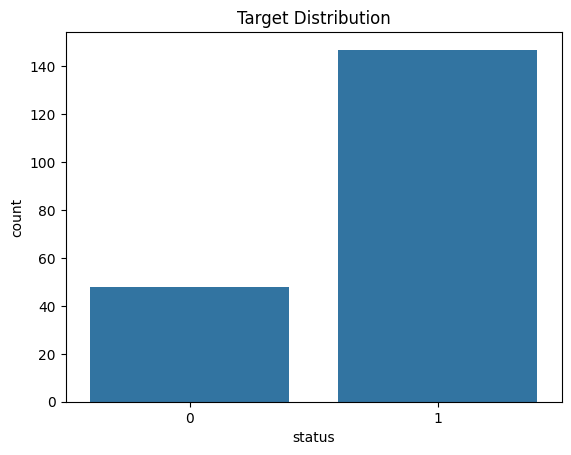

status
1    147
0     48
Name: count, dtype: int64

In [7]:
# visualizing the target variable
target_column = 'status'
sns.countplot(x = df[target_column])
plt.title("Target Distribution")
plt.show()
df['status'].value_counts()

### Observation:
* There are more patients with Parkinson's disease than healthy individuals, suggesting a slight class imbalance.

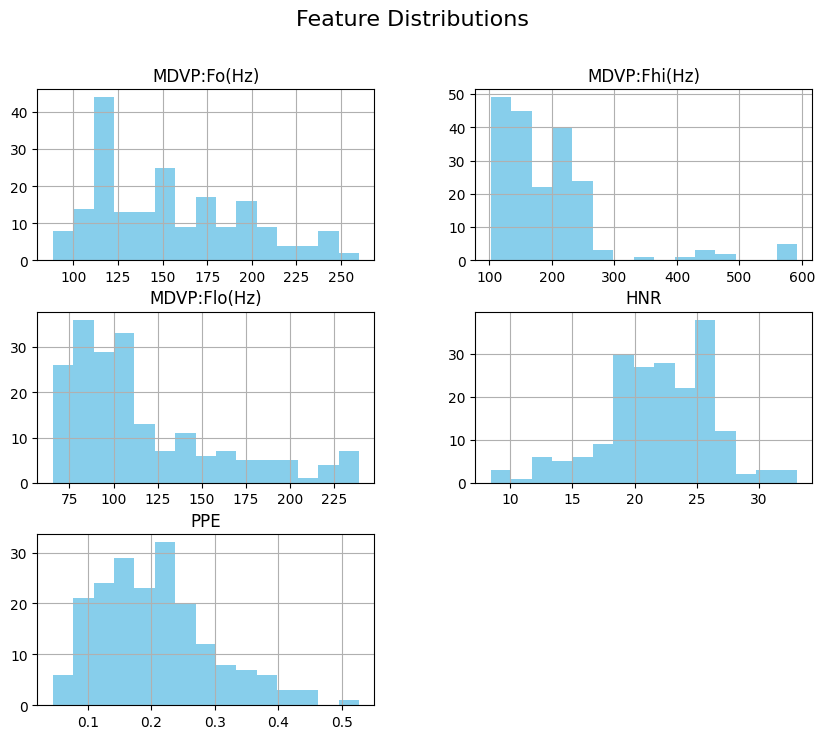

In [8]:
# visualizing the few key features
features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'HNR', 'PPE']
df[features].hist(figsize=(10, 8), bins=15, color='skyblue')
plt.suptitle("Feature Distributions", size=16)
plt.show()

### Observation:
* Features like MDVP:Fo(Hz) have a wide range, confirming the need for feature scaling.
* Some features have skewed distributions.

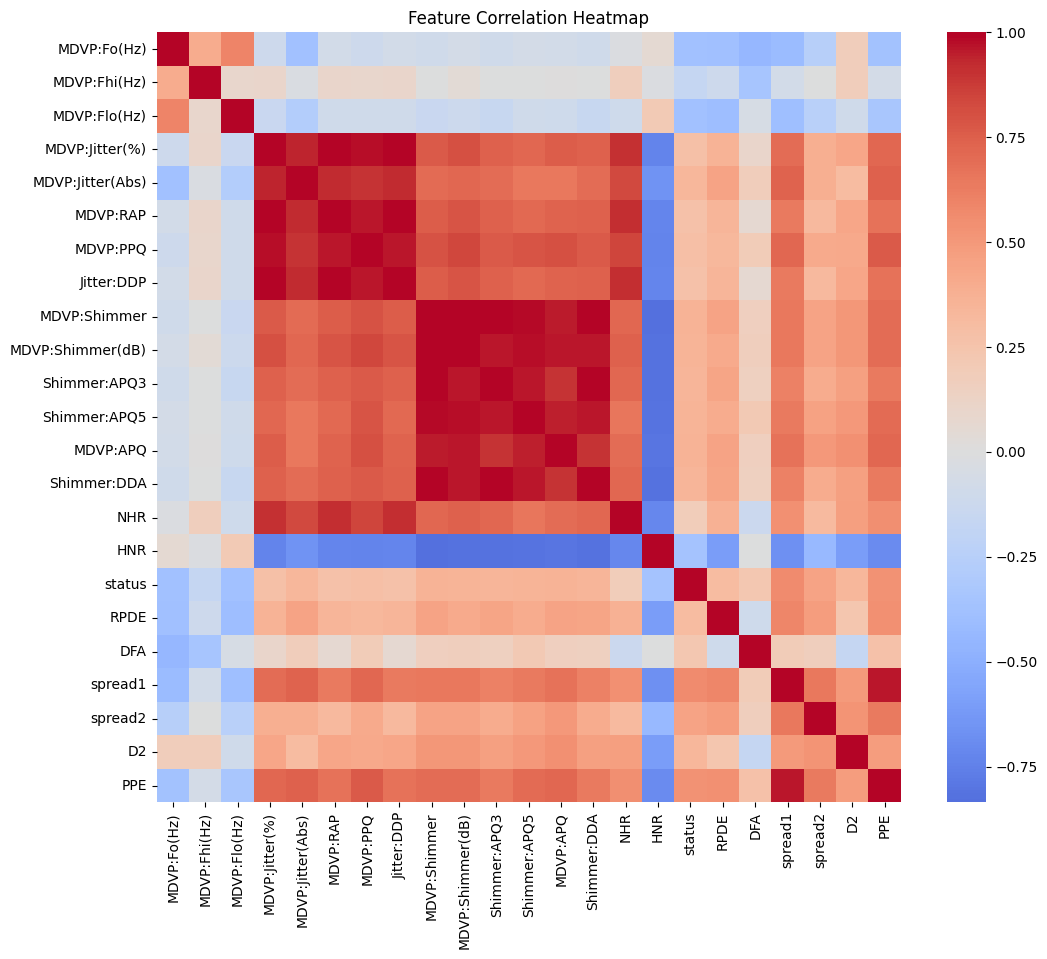

In [9]:
# plotting the correlation matrix
correlation_matrix = df.drop('name', axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot = False, cmap = 'coolwarm', center = 0)
plt.title("Feature Correlation Heatmap")
plt.show()

### Observation:
* Highly correlated features exist, which may affect model performance.

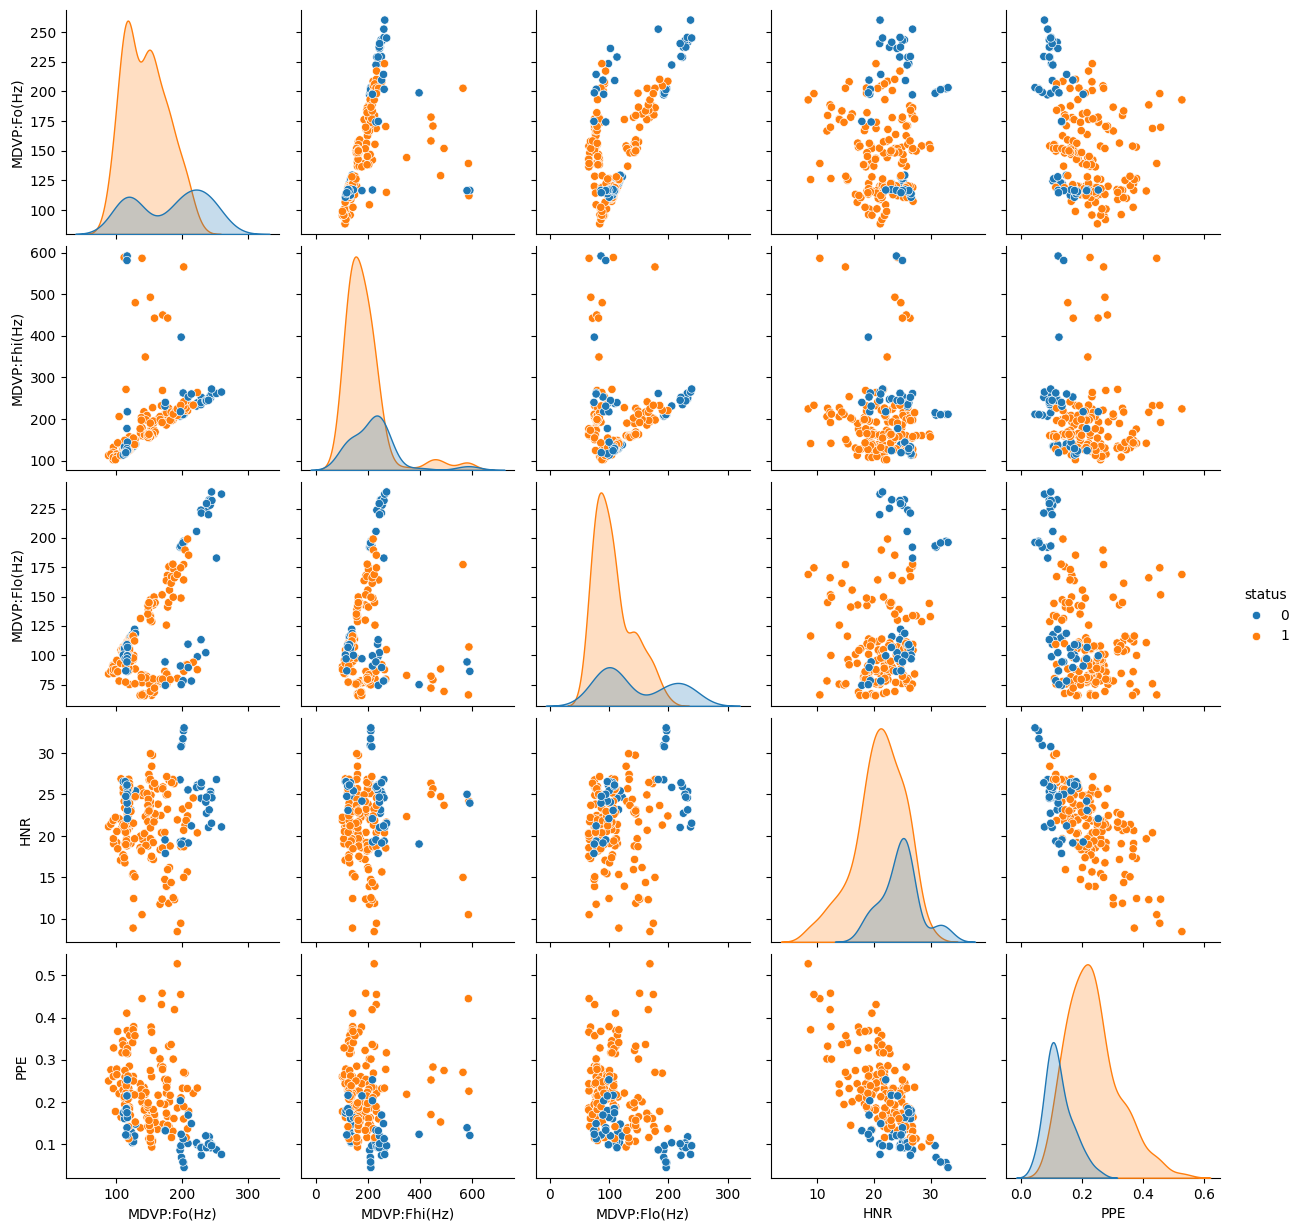

In [10]:
# visualizing the target variable through the pairplot
sns.pairplot(df[features + [target_column]], hue = target_column, diag_kind = "kde")
plt.show()

### Observation:
* Clear separations are visible in some features between the two classes.

## 4: Data Preprocessing

In [11]:
# dropping the name column (not relevant for modeling)
data = df.drop(columns = ['name'])

In [12]:
# splitting the data into target and features
X = data.drop(columns = ['status'])
y = data['status']

In [13]:
# scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 5: Model Training

In [15]:
# training the model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True)

## 6: Model Evaluation

In [16]:
# predictions
y_pred = svm_model.predict(X_test)
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]

In [17]:
# evaluating the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.8974358974358975
Confusion Matrix:
 [[ 3  4]
 [ 0 32]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39

ROC-AUC Score: 0.8482142857142856


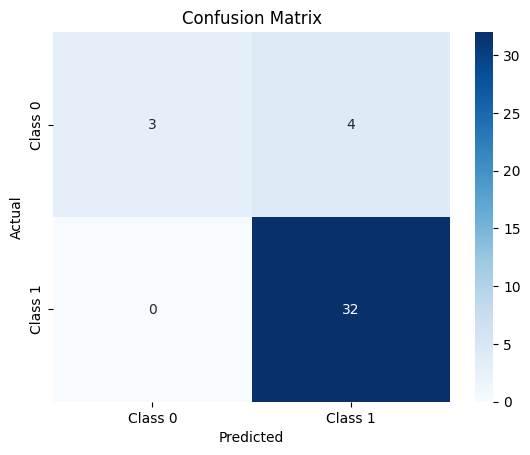

In [18]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

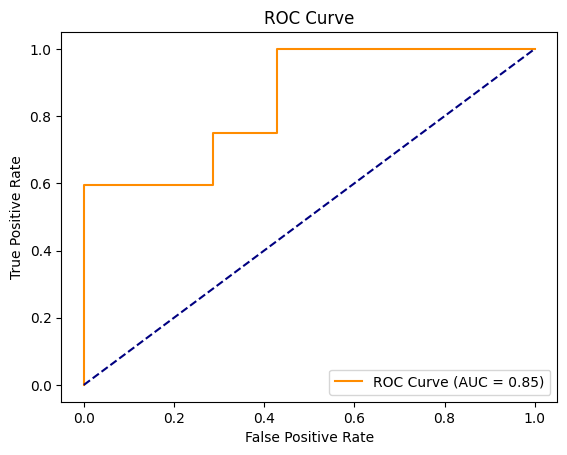

In [19]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

### Observation:
* The model achieves a high ROC-AUC score, indicating strong performance.
* The confusion matrix shows that most predictions are correct.

## 7: Simple Prediction System

In [20]:
# bulding a simple prediction system (using the random data of a healthy person from the dataset)
input = (237.22600,247.32600,225.22700,0.00298,0.00001,0.00169,0.00182,0.00507,0.01752,0.16400,0.01035,0.01024,0.01133,0.03104,0.00740,22.73600,0.305062,0.654172,-7.310550,0.098648,2.416838,0.095032)

input = np.array(input).reshape(1, -1)
input = scaler.transform(input)

prediction = svm_model.predict(input)

if prediction == 1:
    print("The person has Parkinson's Disease.")
else:
    print("The person does not have Parkinson's Disease.")


The person does not have Parkinson's Disease.


## Summary:
1. The dataset was analyzed to explore relationships between features and the target variable. Various visualizations provided insights into the distribution of key features and their correlations.

2. An SVM model was trained, achieving the following evaluation metrics:
  * Accuracy: 89.74%
  * ROC-AUC Score: 0.848
  * Classification Report Observations:
    * Precision for class 0 (healthy individuals): 1.00
    * Precision for class 1 (Parkinson's): 0.89
    * Recall for class 0: 0.43 (indicating some misclassifications of healthy individuals).
    * Recall for class 1: 1.00 (indicating the model identified all Parkinson's cases correctly).
  
3. The model performed well, especially for identifying individuals with Parkinson's disease, though there is room for improvement in detecting healthy individuals.

4. A simple prediction system was built, which can classify new data points.